1. Veri okuma

Daha önce ön işleme adımlarından geçirilen veri yüklendi.

In [ ]:
import pandas as pd

file_path = "datasets/new_processed_thyroid_cancer_data.csv"
df = pd.read_csv(file_path)

df.head()  # İlk birkaç satırı görüntüle

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,0.656629,1.400955,0.900878,0.381020,-0.645251,2.635169,-0.543565,-0.422706,-0.565731,-0.423159,1.521284,-0.393303,-0.974551,-0.998840,0.025416,0
1,-1.054325,1.400955,-0.699600,1.218197,-0.645251,2.635169,-0.543565,-0.422706,-0.565731,-0.423159,-1.128017,-0.321735,1.065424,1.089735,0.025416,0
2,1.581469,1.400955,0.500759,0.381020,-0.645251,-0.379482,-0.543565,-0.422706,-0.565731,-0.423159,0.428535,0.704061,1.079396,1.483541,0.025416,0
3,1.072807,-0.713799,-0.299480,-0.456157,-0.645251,-0.379482,-0.543565,-0.422706,-0.565731,-0.423159,-0.330416,0.739844,1.298298,-0.028391,1.380655,0
4,-0.776873,-0.713799,-0.699600,-1.293334,1.549784,2.635169,-0.543565,-0.422706,-0.565731,-0.423159,1.426415,0.131523,1.144601,-0.274519,-1.329824,0


2.2. Eğitim ve Test Veri Seti Ayrımı

Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak veri ayrıldı.
Daha sonra veri eğitim ve test setlerine bölündü.

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2.3. Ölçeklendirme

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. En iyi k ve mesafe değerini bulma ve performans metrikleri

Farklı K değerleri ve mesafe metrikleri kullanarak modelin performansı ölçüldü.
Her K ve metrik için doğruluk, özgünlük, duyarlılık, kesinlik ve F1 skorları hesaplandı.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#k_values = range(1, 21)
k_values = [k for k in range(3, 22, 2)]  # 3 ile 21 arasında sadece tek sayılar
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
results = []

for metric in distance_metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append((k, metric, accuracy, specificity, recall, precision, f1))

# Sonuçları DataFrame olarak oluştur
results_df = pd.DataFrame(results, columns=["K", "Metric", "Accuracy", "Specificity", "Recall", "Precision", "F1 Score"])

# En iyi parametreleri belirleme
en_iyi_sonuc = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]
best_k = int(en_iyi_sonuc["K"])
best_metric = en_iyi_sonuc["Metric"]

3.2. Değişen k Değerleri ve Uzaklık Ölçüm Parametrelerine Göre Edinilen sonuçların F1-Skoru ile En İyi 10 Verinin Sıralanması 

In [15]:
from IPython.display import display

display(results_df.sort_values(by="F1 Score", ascending=False).head(10))

print(f"En iyi sonuç:\nK= {best_k},\nMesafe Metriği= {best_metric}")

,K,Metric,Accuracy,Specificity,Recall,Precision,F1 Score
10,3,manhattan,0.770769,0.721273,0.820171,0.746712,0.781720
11,5,manhattan,0.768808,0.735134,0.802418,0.752181,0.776488
12,7,manhattan,0.767659,0.749272,0.786012,0.758499,0.772011
13,9,manhattan,0.765928,0.756540,0.775298,0.761362,0.768267
0,3,euclidean,0.758115,0.718973,0.797184,0.739718,0.767377
20,3,minkowski,0.758115,0.718973,0.797184,0.739718,0.767377
14,11,manhattan,0.764059,0.761906,0.766208,0.763264,0.764733
15,13,manhattan,0.763507,0.767058,0.759963,0.765729,0.762835
1,5,euclidean,0.756537,0.734245,0.778788,0.745932,0.762006
21,5,minkowski,0.756537,0.734245,0.778788,0.745932,0.762006


En iyi sonuç:
K= 3,
Mesafe Metriği= manhattan


3.2. En iyi metriklerle eğitim

Seçilen en iyi K ve mesafe metriği ile modeli tekrar eğitildi.

In [16]:
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

print(f"Model en iyi parametrelerle eğitildi")

Model en iyi parametrelerle eğitildi


4. Performans Metrikleri

Seçilen en iyi modelin doğruluk, duyarlılık, kesinlik, özgünlük ve F1 skorları hesaplandı.

In [17]:
accuracy = accuracy_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"En İyi Modelin Performans Metrikleri:")
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Duyarlılık (Sensitivity / Recall): {recall:.4f}")
print(f"Özgünlük (Specificity): {specificity:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"F1 Skoru: {f1:.4f}")

En İyi Modelin Performans Metrikleri:
Doğruluk (Accuracy): 0.7708
Duyarlılık (Sensitivity / Recall): 0.8202
Özgünlük (Specificity): 0.7213
Kesinlik (Precision): 0.7467
F1 Skoru: 0.7817


4.1. ROC Eğrisi

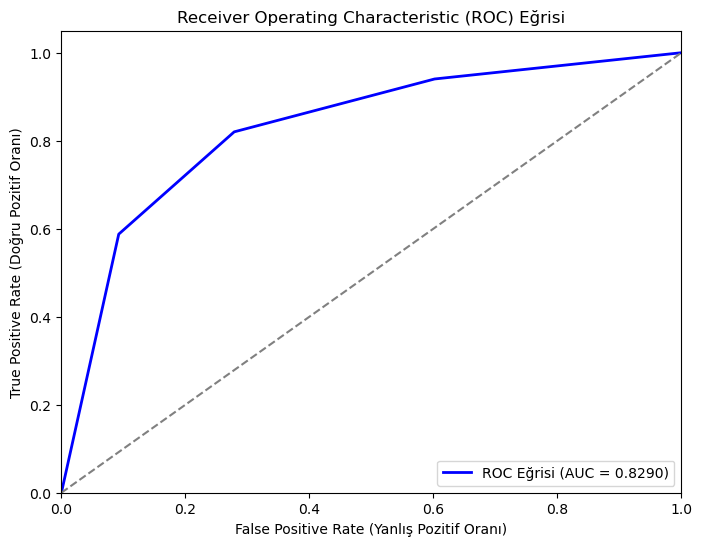

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = knn_best.predict_proba(X_test_scaled)[:, 1]  # Pozitif sınıfın olasılık değerleri

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Rastgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.title('Receiver Operating Characteristic (ROC) Eğrisi')
plt.legend(loc="lower right")
plt.show()

4.2. Özellik Önem Sıralaması

Random Forest modeli kullanarak özelliklerin model üzerindeki önem derecelerini belirlendi.
Model eğitildikten sonra, en önemli 10 özellik grafik ile görselleştirildi.

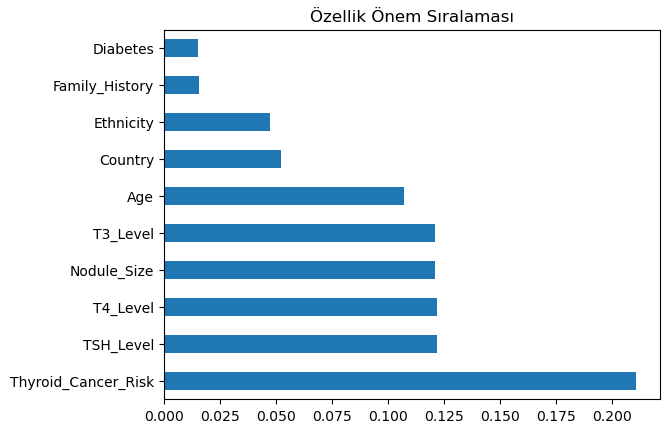

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Özellik Önem Sıralaması")
plt.show()
